In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm 

# Import data

Chargement des corrdonnées de la vache

In [13]:
X_shoulder = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  header=None)
X_shoulder


,0,1,2,3
0,0.166457,0.008873,1.001398,1.048313
1,0.168241,0.015035,0.992619,1.041969
2,0.169740,0.020408,0.984892,1.036530
3,0.170978,0.025045,0.978149,1.031934
4,0.171978,0.028997,0.972324,1.028118
...,...,...,...,...
1370,0.236992,0.083251,0.545055,1.410483
1371,0.220609,0.078841,0.564080,1.413386
1372,0.202257,0.074052,0.587869,1.416906
1373,0.181830,0.068883,0.616711,1.421086


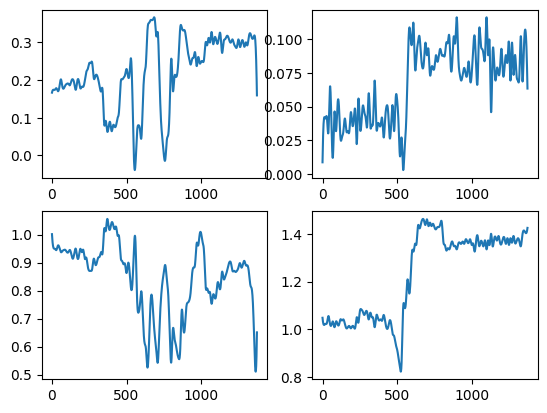

In [16]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_shoulder)) , X_shoulder[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_shoulder)) ,X_shoulder[3])


# Train model

In [11]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "diag",
                               n_iter=50)
        model.fit(X_shoulder)
        models.append(model)
        scores.append(model.score(X_shoulder))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_shoulder)

Model is not converging.  Current: 9295.18754486561 is not greater than 9295.187728960453. Delta is -0.00018409484255244024
Model is not converging.  Current: 9295.19154853986 is not greater than 9295.1919934785. Delta is -0.00044493863970274106
Model is not converging.  Current: 10601.031454230932 is not greater than 10601.233183876924. Delta is -0.20172964599260013
Model is not converging.  Current: 9876.157322918403 is not greater than 9876.159907492827. Delta is -0.002584574423963204
Model is not converging.  Current: 9887.46472933255 is not greater than 9887.477257356944. Delta is -0.012528024393759551
Model is not converging.  Current: 10600.998517700671 is not greater than 10601.12619916915. Delta is -0.12768146847884054
Model is not converging.  Current: 9876.15807798487 is not greater than 9876.158319284596. Delta is -0.00024129972553055268


estimated mean and covar of each state

In [7]:
print(model.means_)
print(model.covars_)

[[0.28997212 0.08249361 0.86024216 1.36807937]
 [0.16990716 0.03956294 0.94761028 1.03225525]
 [0.09622249 0.06289783 0.83783959 1.17823694]
 [0.27999431 0.09156356 0.63433377 1.39633862]]
[[[0.00059637 0.         0.         0.        ]
  [0.         0.00016628 0.         0.        ]
  [0.         0.         0.00396989 0.        ]
  [0.         0.         0.         0.00022442]]

 [[0.00253378 0.         0.         0.        ]
  [0.         0.0001163  0.         0.        ]
  [0.         0.         0.00217703 0.        ]
  [0.         0.         0.         0.00060836]]

 [[0.00803808 0.         0.         0.        ]
  [0.         0.00108897 0.         0.        ]
  [0.         0.         0.00463454 0.        ]
  [0.         0.         0.         0.04707073]]

 [[0.00482578 0.         0.         0.        ]
  [0.         0.0001312  0.         0.        ]
  [0.         0.         0.00499379 0.        ]
  [0.         0.         0.         0.00216408]]]


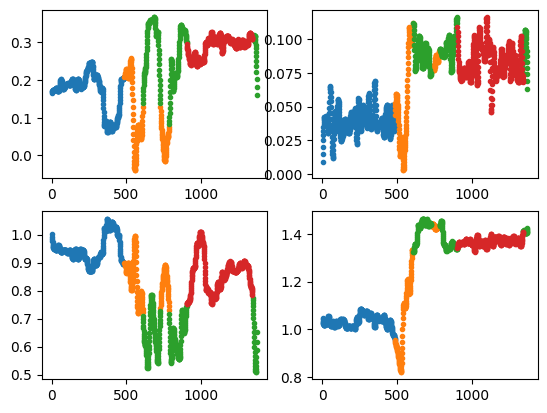

In [17]:
states= pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_shoulder[3][(Z == i)]
    plt.plot(x, y, '.')


In [10]:
df=pd.DataFrame({'states':Z})
df.to_csv("E:/UQAM/Recherche/Thomas/data/cow_coords_hmmstates.csv")

# Import data

Chargement des corrdonnées du museau 

In [14]:
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  header=None)
X_snout


,0,1,2,3
0,0.182095,0.564310,0.168614,0.233524
1,0.183028,0.535635,0.172195,0.265240
2,0.183667,0.513194,0.175082,0.289693
3,0.184043,0.496454,0.177336,0.307510
4,0.184191,0.484884,0.179015,0.319314
...,...,...,...,...
1370,0.225228,0.723106,0.152929,0.182148
1371,0.224485,0.714644,0.142189,0.174504
1372,0.227563,0.707101,0.129164,0.165155
1373,0.234720,0.700602,0.113701,0.153982


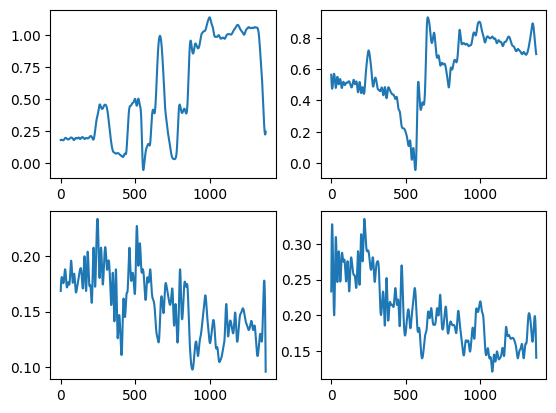

In [15]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_snout)) , X_snout[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_snout)) ,X_snout[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_snout)) ,X_snout[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_snout)) ,X_snout[3])


# Train model

In [18]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "diag", n_iter=50)
        model.fit(X_snout)
        models.append(model)
        scores.append(model.score(X_snout))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_snout)

Model is not converging.  Current: 9428.802936203825 is not greater than 9428.806376757311. Delta is -0.0034405534861434717
Model is not converging.  Current: 9499.130612986799 is not greater than 9499.38556844748. Delta is -0.25495546068123076


In [19]:
print(model.means_)
print(model.covars_)

[[1.00660822 0.77844216 0.13103582 0.16620582]
 [0.16069508 0.48429108 0.17156102 0.24984964]
 [0.35778976 0.34095324 0.1892782  0.22408148]
 [0.37768096 0.68978909 0.15484777 0.19046915]]
[[[0.00381021 0.         0.         0.        ]
  [0.         0.00243876 0.         0.        ]
  [0.         0.         0.00025863 0.        ]
  [0.         0.         0.         0.00056493]]

 [[0.00306385 0.         0.         0.        ]
  [0.         0.00145247 0.         0.        ]
  [0.         0.         0.00039074 0.        ]
  [0.         0.         0.         0.0013923 ]]

 [[0.02113388 0.         0.         0.        ]
  [0.         0.04302614 0.         0.        ]
  [0.         0.         0.00033723 0.        ]
  [0.         0.         0.         0.00205171]]

 [[0.0501827  0.         0.         0.        ]
  [0.         0.01316421 0.         0.        ]
  [0.         0.         0.00034709 0.        ]
  [0.         0.         0.         0.0002369 ]]]


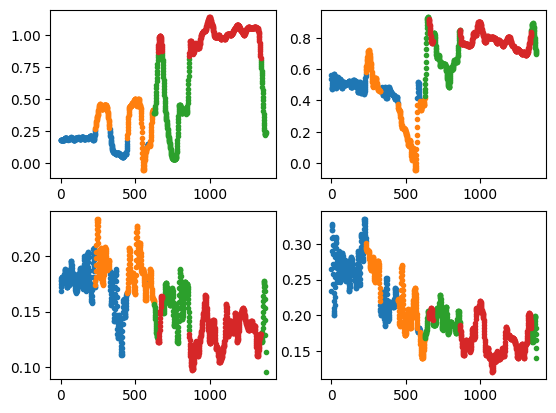

In [20]:
states= pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_snout[3][(Z == i)]
    plt.plot(x, y, '.')


# Import data

Chargement des corrdonnées du museau 

In [21]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  header=None)
X_head


,0,1,2,3
0,0.171130,0.391502,0.516889,0.663207
1,0.172891,0.411942,0.520052,0.637912
2,0.174267,0.428778,0.522600,0.617213
3,0.175295,0.442282,0.524578,0.600754
4,0.176014,0.452724,0.526035,0.588182
...,...,...,...,...
1370,0.223776,0.727776,0.387667,0.667878
1371,0.218780,0.710023,0.390090,0.669977
1372,0.216704,0.692295,0.391427,0.670888
1373,0.217767,0.674704,0.391580,0.670472


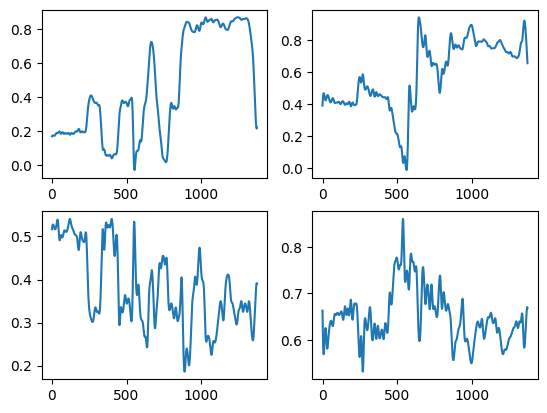

In [22]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_head)) , X_head[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_head)) ,X_head[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_head)) ,X_head[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_head)) ,X_head[3])


# Train model

In [33]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "diag", n_iter=50)
        model.fit(X_head)
        models.append(model)
        scores.append(model.score(X_head))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_head)

In [31]:
print(model.means_)
print(model.covars_)

[[0.38262442 0.67690929 0.35151271 0.65309014]
 [0.83382843 0.77188693 0.32239801 0.61587855]
 [0.15453603 0.42845855 0.50730565 0.63718435]
 [0.26150826 0.27399057 0.34606962 0.74894146]]
[[[0.03630202 0.         0.         0.        ]
  [0.         0.01800366 0.         0.        ]
  [0.         0.         0.00300904 0.        ]
  [0.         0.         0.         0.00213616]]

 [[0.00076451 0.         0.         0.        ]
  [0.         0.00222789 0.         0.        ]
  [0.         0.         0.00416529 0.        ]
  [0.         0.         0.         0.0008647 ]]

 [[0.00349584 0.         0.         0.        ]
  [0.         0.00066876 0.         0.        ]
  [0.         0.         0.00045864 0.        ]
  [0.         0.         0.         0.00073237]]

 [[0.01611515 0.         0.         0.        ]
  [0.         0.02416609 0.         0.        ]
  [0.         0.         0.00315739 0.        ]
  [0.         0.         0.         0.00148669]]]


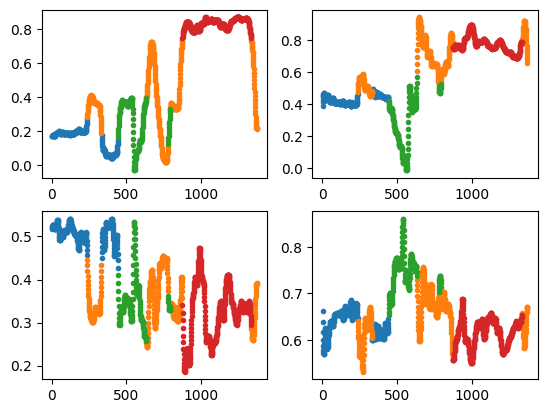

In [34]:
states= pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[3][(Z == i)]
    plt.plot(x, y, '.')
